In [ ]:
import cv2
print(cv2.__version__)

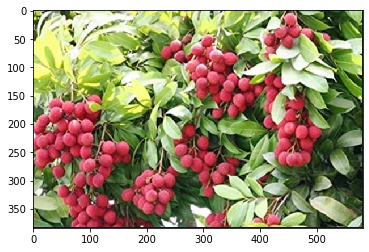

In [1]:
# import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import argparse
import cv2

image = cv2.imread("Lyche_trees.JPG")
image1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.imshow(image1)

In [2]:
#defining the range of Red color
lower_red = np.array([160,20,70])
upper_red = np.array([190,255,255])

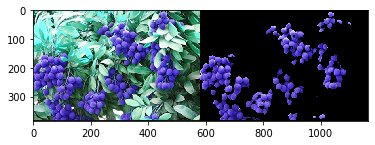

In [3]:
mask = cv2.inRange(hsv, lower_red, upper_red)
output = cv2.bitwise_and(image, image, mask = mask)
plt.imshow(np.hstack([image, output]))
#cv2.waitKey(0)

# Object tracking

In [ ]:
# import cv2
# import numpy as np

# def nothing(x):
#     pass

# cv2.namedWindow("Tracking")
# cv2.createTrackbar("LH", "Tracking", 0, 255, nothing)
# cv2.createTrackbar("LS", "Tracking", 0, 255, nothing)
# cv2.createTrackbar("LV", "Tracking", 0, 255, nothing)
# cv2.createTrackbar("UH", "Tracking", 255, 255, nothing)
# cv2.createTrackbar("US", "Tracking", 255, 255, nothing)
# cv2.createTrackbar("UV", "Tracking", 255, 255, nothing)

# while True:
#     frame = cv2.imread("Lyche_trees.JPG")

#     hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

#     l_h = cv2.getTrackbarPos("LH", "Tracking")
#     l_s = cv2.getTrackbarPos("LS", "Tracking")
#     l_v = cv2.getTrackbarPos("LV", "Tracking")

#     u_h = cv2.getTrackbarPos("UH", "Tracking")
#     u_s = cv2.getTrackbarPos("US", "Tracking")
#     u_v = cv2.getTrackbarPos("UV", "Tracking")

#     l_b = np.array([l_h, l_s, l_v])
#     u_b = np.array([u_h, u_s, u_v])

#     mask = cv2.inRange(hsv, l_b, u_b)

#     res = cv2.bitwise_and(frame, frame, mask=mask)

#     plt.imshow( frame)
#     plt.imshow(mask)
#     plt.imshow(res)

#     key = cv2.waitKey(1)
#     if key == 27:
#         break

# #cv2.destroyAllWindows()

# Rotation Image

In [ ]:
# import the necessary packages
import numpy as np
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt
# construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True, help="path to the image file")
# args = vars(ap.parse_args())

In [ ]:
# load the image from disk
image = cv2.imread("lichu.jpg")
# loop over the rotation angles
for angle in np.arange(0, 360, 15):
    rotated = imutils.rotate(image, angle)
    cv2.imshow("Rotated (Problematic)", rotated)
    cv2.waitKey(0)


In [ ]:
# loop over the rotation angles again, this time ensuring
# no part of the image is cut off
for angle in np.arange(0, 360, 15):
    rotated = imutils.rotate_bound(image, angle)
    cv2.imshow("Rotated (Correct)", rotated)
    cv2.waitKey(0)


In [ ]:
# load the image from disk, convert it to grayscale, blur it,
# and apply edge detection to reveal the outline of the pill
image = cv2.imread("lichu.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3), 0)
edged = cv2.Canny(gray, 100, 500)
plt.imshow(edged)

In [ ]:
# find contours in the edge map
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [ ]:

# ensure at least one contour was found
if len(cnts) > 0:
    # grab the largest contour, then draw a mask for the pill
    c = max(cnts, key=cv2.contourArea)
    mask = np.zeros(gray.shape, dtype="uint8")
    cv2.drawContours(mask, [c], -1, 255, -1)
    # compute its bounding box of pill, then extract the ROI,
    # and apply the mask
    (x, y, w, h) = cv2.boundingRect(c)
    imageROI = image[y:y + h, x:x + w]
    maskROI = mask[y:y + h, x:x + w]
    imageROI = cv2.bitwise_and(imageROI, imageROI,mask=maskROI)

In [ ]:
# loop over the rotation angles
for angle in np.arange(0, 360, 15):
    rotated = imutils.rotate(imageROI, angle)
    cv2.imshow("Rotated (Problematic)", rotated)
    cv2.waitKey(0)
# loop over the rotation angles again, this time ensure the
# entire pill is still within the ROI after rotation
for angle in np.arange(0, 360, 15):
    rotated = imutils.rotate_bound(imageROI, angle)
    cv2.imshow("Rotated (Correct)", rotated)
    cv2.waitKey(0)

# Build Montage

In [4]:
# import the necessary packages
from imutils import build_montages
from imutils import paths
import argparse
import random
import cv2

In [5]:
# grab the paths to the images, then randomly select a sample of
# them
imagePaths = list(paths.list_images(r"C:\Users\shihab\Desktop\Open cv Project"))
random.shuffle(imagePaths)
imagePaths = imagePaths

In [6]:
# initialize the list of images
images = []
# loop over the list of image paths
for imagePath in imagePaths:
    # load the image and update the list of images
    image = cv2.imread(imagePath)
    images.append(image)
# construct the montages for the images
montages = build_montages(images, (128, 196), (3, 2))

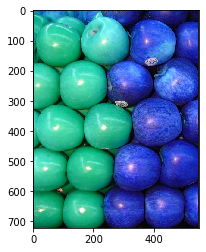

In [7]:
import matplotlib.pyplot as plt
plt.imshow(images[2])

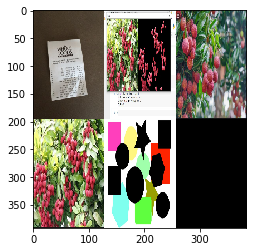

In [8]:
for montage in montages:
    montage = cv2.cvtColor(montage,cv2.COLOR_BGR2RGB)
    plt.imshow(montage)#     cv2.imshow("Montage", montage)
#     cv2.waitKey(0)


# Open Cv Centre of Contour

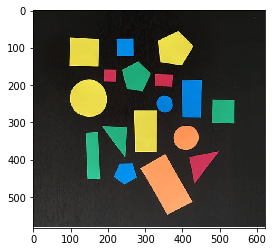

In [9]:
# import the necessary packages
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt 
# construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True,help="path to the input image")
# args = vars(ap.parse_args())
# load the image, convert it to grayscale, blur it slightly,
# and threshold it
image = cv2.imread("Centre_of_Contour.JPG")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

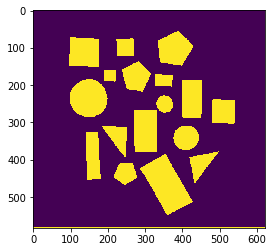

In [10]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]

plt.imshow(thresh)

In [11]:
# find contours in the thresholded image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

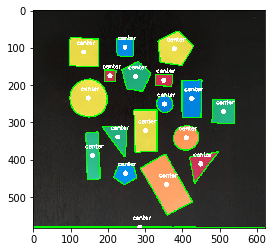

In [12]:
# loop over the contours
for c in cnts:
    
    # compute the center of the contour
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    
    # draw the contour and center of the shape on the image
    cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
    cv2.circle(image, (cX, cY), 7, (255, 255, 255), -1)
    cv2.putText(image, "center", (cX - 20, cY - 20),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    
    # show the image
    
    plt.imshow(image)
#     cv2.imshow("Image", image)
#     cv2.waitKey(0)


# FInding Shapes in Open CV

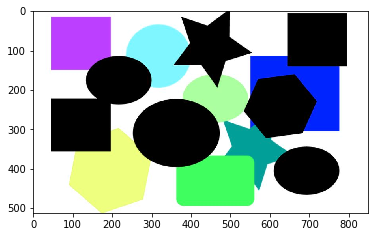

In [13]:
# import the necessary packages
import numpy as np
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt
# construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", help = "path to the image file")
# args = vars(ap.parse_args())
# # load the image
image = cv2.imread("black_image.JPG")
plt.imshow(image)

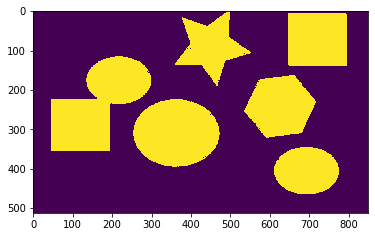

In [14]:
#Our Goal: Detect the black shapes in the image.

# find all the 'black' shapes in the image
lower = np.array([0, 0, 0])
upper = np.array([15, 15, 15])
shapeMask = cv2.inRange(image, lower, upper)

plt.imshow(shapeMask)

I found 6 black shapes


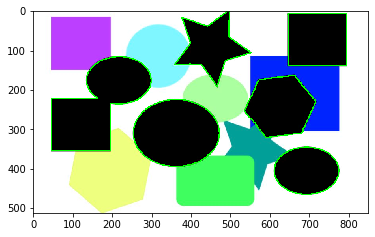

In [15]:
# find the contours in the mask
cnts = cv2.findContours(shapeMask.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
print("I found {} black shapes".format(len(cnts)))

# loop over the contours
for c in cnts:
    # draw the contour and show it
    f= cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
    plt.imshow(f)


# Finding Extreme Points 

In [16]:
# import the necessary packages
import imutils
import cv2
# load the image, convert it to grayscale, and blur it slightly
image = cv2.imread("hand.JPG")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
# threshold the image, then perform a series of erosions +
# dilations to remove any small regions of noise
thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)
# find contours in thresholded image, then grab the largest
# one
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)

In [17]:
print(c)

[[[149  59]]

 [[148  60]]

 [[146  60]]

 ...

 [[161  60]]

 [[158  60]]

 [[157  59]]]


In [18]:
# determine the most extreme points along the contour
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])

In [19]:
print(extLeft)
print(extRight)
print(extTop)
print(extBot)

(58, 165)
(364, 244)
(149, 59)
(115, 495)


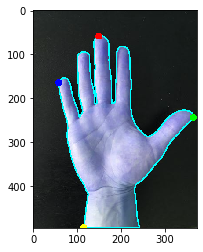

In [20]:
# draw the outline of the object, then draw each of the
# extreme points, where the left-most is red, right-most
# is green, top-most is blue, and bottom-most is teal
cv2.drawContours(image, [c], -1, (0, 255, 255), 2)
cv2.circle(image, extLeft, 8, (0, 0, 255), -1)
cv2.circle(image, extRight, 8, (0, 255, 0), -1)
cv2.circle(image, extTop, 8, (255, 0, 0), -1)
cv2.circle(image, extBot, 8, (255, 255, 0), -1)
# show the output image
# cv2.imshow("Image", image)
# cv2.waitKey(0)
plt.imshow(image)

# Open Cv shape detector

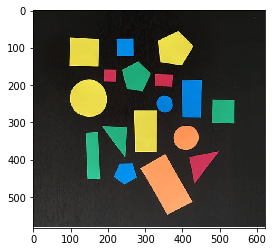

In [21]:
# import the necessary packages
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt 

image = cv2.imread("Centre_of_Contour.JPG")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [22]:
# import the necessary packages
import cv2
class ShapeDetector:
    def __init__(self):
        pass
    def detect(self, c):
        # initialize the shape name and approximate the contour
        shape = "unidentified"
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.04 * peri, True)
        
        
            # if the shape is a triangle, it will have 3 vertices
        if len(approx) == 3:
            shape = "triangle"
        # if the shape has 4 vertices, it is either a square or
        # a rectangle
        elif len(approx) == 4:
            # compute the bounding box of the contour and use the
            # bounding box to compute the aspect ratio
            (x, y, w, h) = cv2.boundingRect(approx)
            ar = w / float(h)
            # a square will have an aspect ratio that is approximately
            # equal to one, otherwise, the shape is a rectangle
            shape = "square" if ar >= 0.95 and ar <= 1.05 else "rectangle"
        # if the shape is a pentagon, it will have 5 vertices
        elif len(approx) == 5:
            shape = "pentagon"
        # otherwise, we assume the shape is a circle
        else:
            shape = "circle"
        # return the name of the shape
        return shape

In [23]:
# load the image and resize it to a smaller factor so that
# the shapes can be approximated better
image = cv2.imread("Centre_of_Contour.JPG")
resized = imutils.resize(image, width=300)
ratio = image.shape[0] / float(resized.shape[0])
# convert the resized image to grayscale, blur it slightly,
# and threshold it
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]
# find contours in the thresholded image and initialize the
# shape detector
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
sd = ShapeDetector()

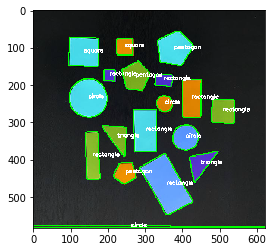

In [24]:
# loop over the contours
for c in cnts:
# compute the center of the contour, then detect the name of the
# shape using only the contour
    M = cv2.moments(c)
    cX = int((M["m10"] / M["m00"]) * ratio)
    cY = int((M["m01"] / M["m00"]) * ratio)
    shape = sd.detect(c)
    # multiply the contour (x, y)-coordinates by the resize ratio,
    # then draw the contours and the name of the shape on the image
    c = c.astype("float")
    c *= ratio
    c = c.astype("int")
    cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
    cv2.putText(image, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX,0.5, (255, 255, 255), 2)
    # show the output image
    plt.imshow(image)
#     cv2.imshow("Image", image)
#     cv2.waitKey(0)

# Determining object color with OpenCV

In [25]:
from scipy.spatial import distance as dist
from collections import OrderedDict
import numpy as np
import cv2
class ColorLabeler:
    def __init__(self):
    
        # initialize the colors dictionary, containing the color
        # name as the key and the RGB tuple as the value
        colors = OrderedDict({
            "red": (255, 0, 0),
            "green": (0, 255, 0),
            "blue": (0, 0, 255)})
        # allocate memory for the L*a*b* image, then initialize
        # the color names list
        self.lab = np.zeros((len(colors), 1, 3), dtype="uint8")
        self.colorNames = []
        # loop over the colors dictionary
        for (i, (name, rgb)) in enumerate(colors.items()):
            # update the L*a*b* array and the color names list
            self.lab[i] = rgb
            self.colorNames.append(name)
            # convert the L*a*b* array from the RGB color space
            # to L*a*b*
        self.lab = cv2.cvtColor(self.lab, cv2.COLOR_RGB2LAB)
        

    def label(self, image, c):
        # construct a mask for the contour, then compute the
        # average L*a*b* value for the masked region
        mask = np.zeros(image.shape[:2], dtype="uint8")
        cv2.drawContours(mask, [c], -1, 255, -1)
        mask = cv2.erode(mask, None, iterations=2)
        mean = cv2.mean(image, mask=mask)[:3]
        # initialize the minimum distance found thus far
        minDist = (np.inf, None)

        # loop over the known L*a*b* color values
        for (i, row) in enumerate(self.lab):
            # compute the distance between the current L*a*b*
            # color value and the mean of the image
            d = dist.euclidean(row[0], mean)
            # if the distance is smaller than the current distance,
            # then update the bookkeeping variable
            if d < minDist[0]:
                minDist = (d, i)
        # return the name of the color with the smallest distance
        return self.colorNames[minDist[1]]

In [26]:
# import the necessary packages
import cv2
class ShapeDetector:
    def __init__(self):
        pass
    def detect(self, c):
        # initialize the shape name and approximate the contour
        shape = "unidentified"
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.04 * peri, True)
        
        
            # if the shape is a triangle, it will have 3 vertices
        if len(approx) == 3:
            shape = "triangle"
        # if the shape has 4 vertices, it is either a square or
        # a rectangle
        elif len(approx) == 4:
            # compute the bounding box of the contour and use the
            # bounding box to compute the aspect ratio
            (x, y, w, h) = cv2.boundingRect(approx)
            ar = w / float(h)
            # a square will have an aspect ratio that is approximately
            # equal to one, otherwise, the shape is a rectangle
            shape = "square" if ar >= 0.95 and ar <= 1.05 else "rectangle"
        # if the shape is a pentagon, it will have 5 vertices
        elif len(approx) == 5:
            shape = "pentagon"
        # otherwise, we assume the shape is a circle
        else:
            shape = "circle"
        # return the name of the shape
        return shape

In [27]:
# load the image and resize it to a smaller factor so that
# the shapes can be approximated better
image = cv2.imread("Centre_of_Contour.JPG")
resized = imutils.resize(image, width=300)
ratio = image.shape[0] / float(resized.shape[0])

# blur the resized image slightly, then convert it to both
# grayscale and the L*a*b* color spaces
blurred = cv2.GaussianBlur(resized, (5, 5), 0)
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
lab = cv2.cvtColor(blurred, cv2.COLOR_BGR2LAB)
thresh = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY)[1]

# find contours in the thresholded image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# initialize the shape detector and color labeler
sd = ShapeDetector()
cl = ColorLabeler()

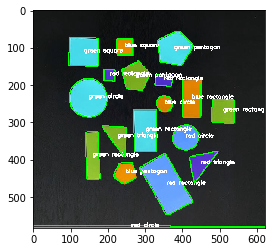

In [28]:
# loop over the contours
for c in cnts:
# compute the center of the contour
    M = cv2.moments(c)
    cX = int((M["m10"] / M["m00"]) * ratio)
    cY = int((M["m01"] / M["m00"]) * ratio)
    # detect the shape of the contour and label the color
    shape = sd.detect(c)
    color = cl.label(lab, c)
    # multiply the contour (x, y)-coordinates by the resize ratio,
    # then draw the contours and the name of the shape and labeled
    # color on the image
    c = c.astype("float")
    c *= ratio
    c = c.astype("int")
    text = "{} {}".format(color, shape)
    cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
    cv2.putText(image, text, (cX, cY),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    # show the output image
    plt.imshow(image)


# Document Scanner 

STEP 1: Edge Detection


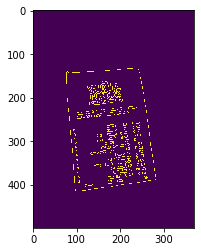

In [29]:
# load the image and compute the ratio of the old height
# to the new height, clone it, and resize it
import cv2
import imutils
import matplotlib.pyplot as plt

image = cv2.imread("scan.JPG")
ratio = image.shape[0] / 500.0
orig = image.copy()
image = imutils.resize(image, height = 500)
# convert the image to grayscale, blur it, and find edges
# in the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(gray, 75, 200)
# show the original image and the edge detected image
print("STEP 1: Edge Detection")
plt.imshow(image)
plt.imshow(edged)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

STEP 2: Find contours of paper


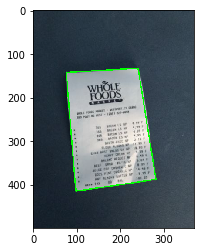

In [30]:
# find the contours in the edged image, keeping only the
# largest ones, and initialize the screen contour
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:5]
# loop over the contours
for c in cnts:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    # if our approximated contour has four points, then we
    # can assume that we have found our screen
    if len(approx) == 4:
        screenCnt = approx
        break
# show the contour (outline) of the piece of paper
print("STEP 2: Find contours of paper")
cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 2)
plt.imshow(image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [31]:
# import the necessary packages
import numpy as np
import cv2
def order_points(pts):
    # initialzie a list of coordinates that will be ordered
    # such that the first entry in the list is the top-left,
    # the second entry is the top-right, the third is the
    # bottom-right, and the fourth is the bottom-left
    rect = np.zeros((4, 2), dtype = "float32")
    # the top-left point will have the smallest sum, whereas
    # the bottom-right point will have the largest sum
    s = pts.sum(axis = 1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    # now, compute the difference between the points, the
    # top-right point will have the smallest difference,
    # whereas the bottom-left will have the largest difference
    diff = np.diff(pts, axis = 1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    # return the ordered coordinates
    return rect

def four_point_transform(image, pts):
    # obtain a consistent order of the points and unpack them
    # individually
    rect = order_points(pts)
    (tl, tr, br, bl) = rect
    # compute the width of the new image, which will be the
    # maximum distance between bottom-right and bottom-left
    # x-coordiates or the top-right and top-left x-coordinates
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))
    # compute the height of the new image, which will be the
    # maximum distance between the top-right and bottom-right
    # y-coordinates or the top-left and bottom-left y-coordinates
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))
    # now that we have the dimensions of the new image, construct
    # the set of destination points to obtain a "birds eye view",
    # (i.e. top-down view) of the image, again specifying points
    # in the top-left, top-right, bottom-right, and bottom-left
    # order
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype = "float32")
    # compute the perspective transform matrix and then apply it
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
    # return the warped image
    return warped

STEP 3: Apply perspective transform


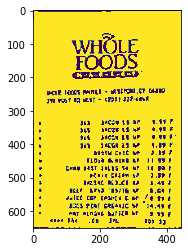

In [32]:
# apply the four point transform to obtain a top-down
# view of the original image
from skimage.filters import threshold_local

warped = four_point_transform(orig, screenCnt.reshape(4, 2) * ratio)
# convert the warped image to grayscale, then threshold it
# to give it that 'black and white' paper effect
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
T = threshold_local(warped, 11, offset = 10, method = "gaussian")
warped = (warped > T).astype("uint8") * 255
# show the original and scanned images
print("STEP 3: Apply perspective transform")
#cv2.imshow("Original", imutils.resize(orig, height = 650))
plt.imshow(imutils.resize(warped, height = 650))
